<a href="https://colab.research.google.com/github/taufiqyfirdaus/PCVK_Genap_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Transformasi Linier Brightness**

Formula: g(x,y)=f(x,y)+b

g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness.

Masukkan nilai kecerahan: 50


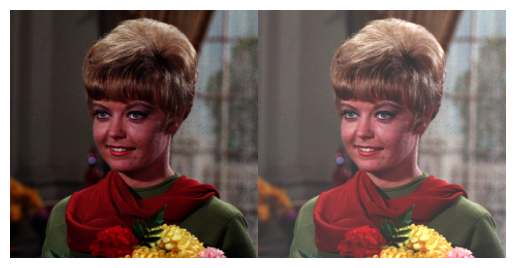

In [ ]:
# Mengubah tingkat kencerahan citra
import cv2
import numpy as np
import matplotlib.pyplot as plt

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[x, y, c] = np.clip(original[x, y, c] + brightness, 0, 255)

final_frame = cv2.hconcat((original, brightness_image))

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(final_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


**Tugas Praktikum**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

4.  Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
a. Averaging
b. Lightness
c. Luminance

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

**JAWAB**

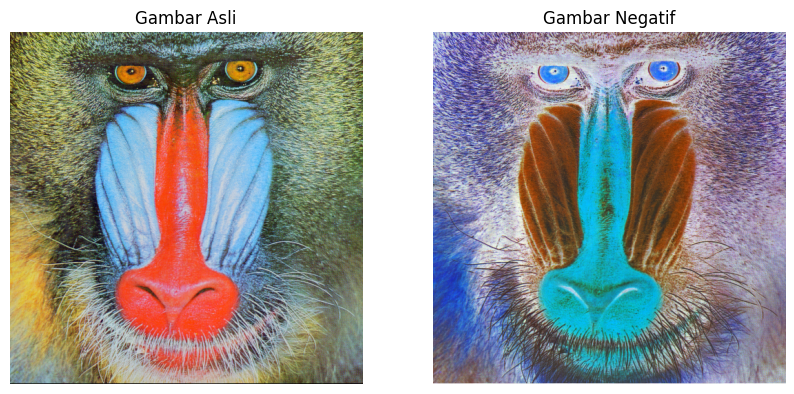

In [ ]:
#1
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')

# Pastikan gambar telah terbaca dengan benar
if original_image is None:
    print("Error: Gambar tidak dapat dibaca.")
else:
    # Buat citra negatif
    negative_image = 255 - original_image

    # Tampilkan gambar asli dan gambar negatif
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Negatif')
    plt.axis('off')

    plt.show()


Masukkan tingkat kecerahan (-255 sampai 255): 50
Masukkan tingkat kontras (1.0 sampai 3.0): 2


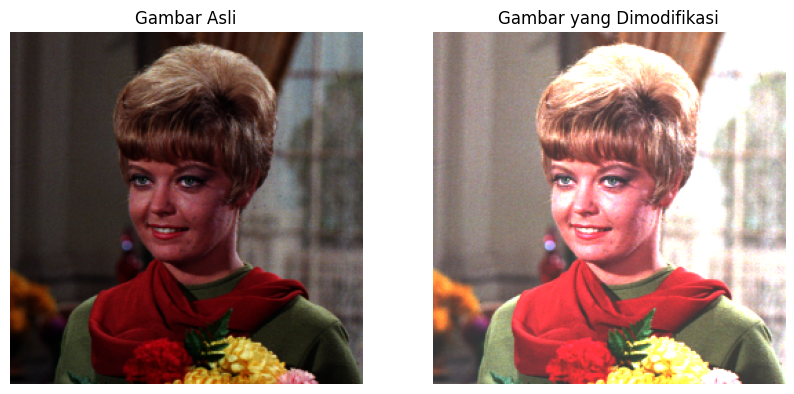

In [ ]:
#2
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Pastikan gambar telah terbaca dengan benar
if original_image is None:
    print("Error: Gambar tidak dapat dibaca.")
else:
    # Input tingkat kecerahan [-255, 255]
    brightness = int(input('Masukkan tingkat kecerahan (-255 sampai 255): '))

    # Input tingkat kontras [1.0, 3.0]
    contrast = float(input('Masukkan tingkat kontras (1.0 sampai 3.0): '))

    # Mengganti kontras dan kecerahan
    modified_image = cv2.convertScaleAbs(original_image, alpha=contrast, beta=brightness)

    # Tampilkan gambar asli dan gambar yang sudah dimodifikasi
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
    plt.title('Gambar yang Dimodifikasi')

    plt.axis('off')
    plt.show()


Masukkan nilai kecerahan: 5


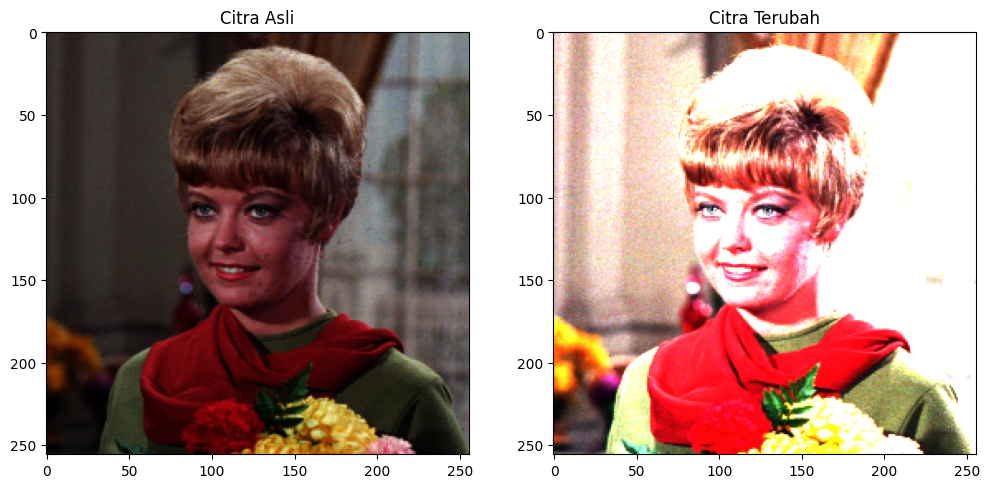

In [ ]:
#3
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Masukkan path gambar dari Google Drive Anda
image_path = "/content/drive/MyDrive/PCVK/Images/female.tiff"

# Baca gambar
image = Image.open(image_path)

# Masukkan nilai kecerahan dari pengguna (dalam float)
brightness_factor = float(input("Masukkan nilai kecerahan: "))

# Ubah tingkat kecerahan citra dengan transformasi log
adjusted_image = np.array(image) * brightness_factor

# Pastikan nilai piksel tetap dalam rentang 0-255
adjusted_image = np.clip(adjusted_image, 0, 255).astype(np.uint8)

# Tampilkan citra asli dan citra yang telah diubah
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Citra Terubah")
plt.imshow(adjusted_image)

plt.show()


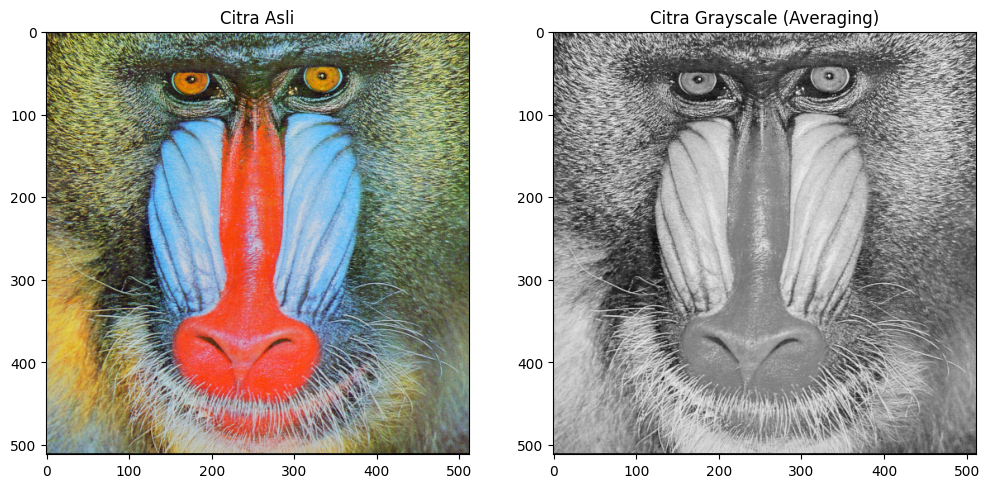

In [ ]:
#4a
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Masukkan path gambar dari Google Drive Anda
image_path = "/content/drive/MyDrive/PCVK/Images/mandrill.tiff"

# Baca gambar
image = Image.open(image_path)

# Konversi gambar ke mode grayscale (metode averaging)
grayscale_image = image.convert("L")

# Tampilkan citra asli dan citra grayscale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Citra Grayscale (Averaging)")
plt.imshow(grayscale_image, cmap="gray")

plt.show()


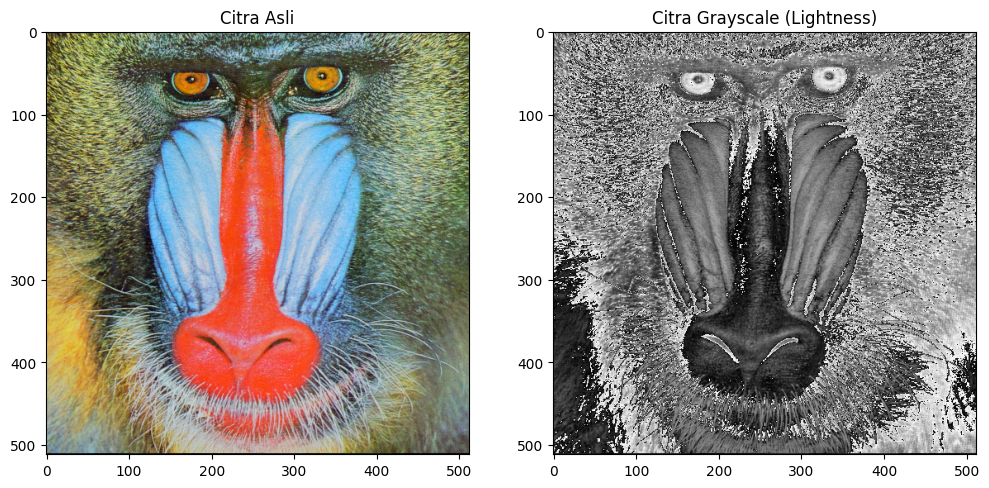

In [ ]:
#4b
# Masukkan path gambar dari Google Drive Anda
image_path = "/content/drive/MyDrive/PCVK/Images/mandrill.tiff"

# Baca gambar
image = Image.open(image_path)

# Konversi gambar ke mode grayscale (metode lightness)
def grayscale_lightness(image):
    image_array = np.array(image)
    max_val = np.max(image_array, axis=2)
    min_val = np.min(image_array, axis=2)
    lightness = ((max_val + min_val) / 2).astype(np.uint8)
    return Image.fromarray(lightness, 'L')

grayscale_image_lightness = grayscale_lightness(image)

# Tampilkan citra asli dan citra grayscale dengan metode lightness
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Citra Grayscale (Lightness)")
plt.imshow(grayscale_image_lightness, cmap="gray")

plt.show()


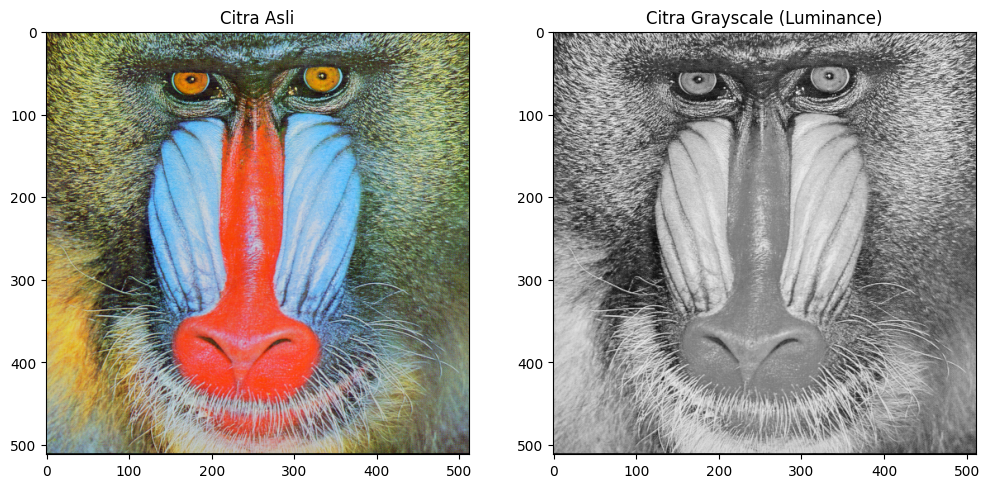

In [ ]:
#4c
# Masukkan path gambar dari Google Drive Anda
image_path = "/content/drive/MyDrive/PCVK/Images/mandrill.tiff"

# Baca gambar
image = Image.open(image_path)

# Konversi gambar ke mode grayscale (metode luminance)
def grayscale_luminance(image):
    image_array = np.array(image)
    luminance = np.dot(image_array[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)
    return Image.fromarray(luminance, 'L')

grayscale_image_luminance = grayscale_luminance(image)

# Tampilkan citra asli dan citra grayscale dengan metode luminance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Citra Grayscale (Luminance)")
plt.imshow(grayscale_image_luminance, cmap="gray")

plt.show()

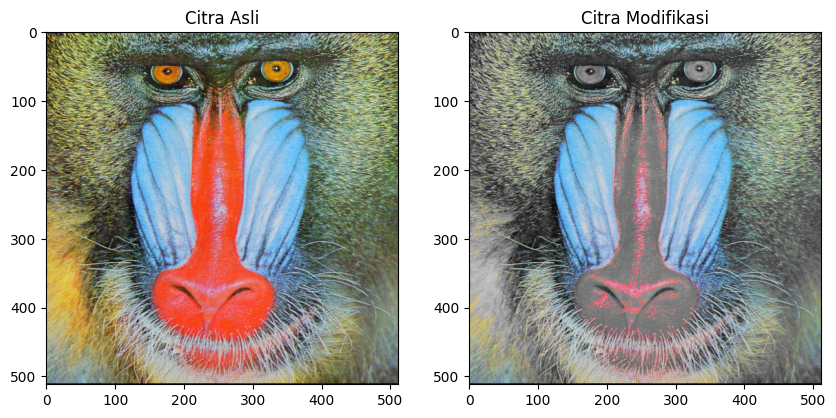

In [ ]:
#5
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Ambil saluran warna biru (B)
blue_channel = img_rgb[:, :, 2]

# Buat masker untuk warna biru (ambang batas di atas 100)
blue_mask = blue_channel > 100

# Buat citra grayscale
gray_background = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)

# Buat citra hasil dengan menggabungkan warna biru dan latar belakang abu-abu
result_image = np.copy(img_rgb)
result_image[~blue_mask] = np.stack((gray_background[~blue_mask],) * 3, axis=-1)

# Tampilkan gambar
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_rgb)
ax[0].set_title("Citra Asli")

ax[1].imshow(result_image)
ax[1].set_title("Citra Modifikasi")
plt.show()

